<a href="https://colab.research.google.com/github/sandralayas/My-Works/blob/Python/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

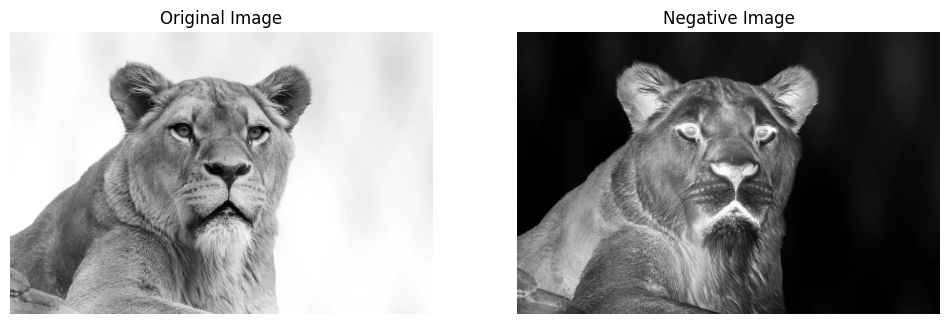

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_negative(image):
    return 255 - image

# Load a grayscale image
image = cv2.imread("/content/sample_data/animal-8748794_1280.webp", cv2.IMREAD_GRAYSCALE)

# Apply negative transformation
negative_image = image_negative(image)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()


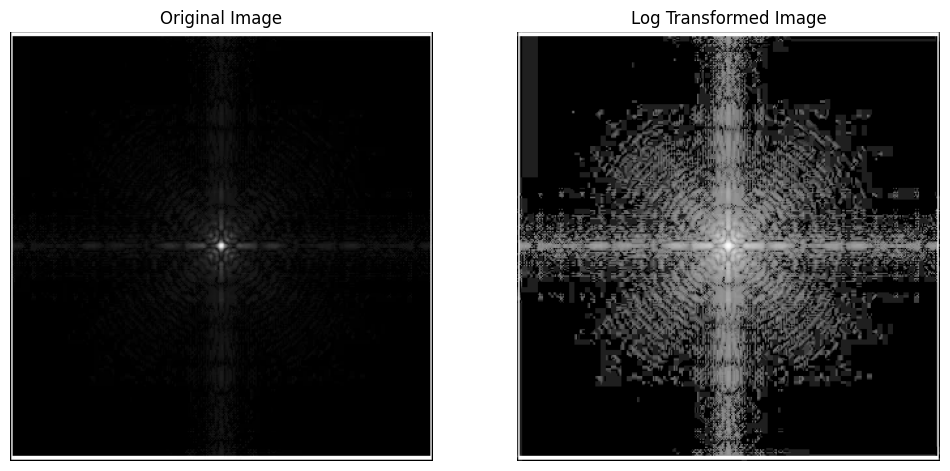

In [2]:
def log_transformation(image, c=1.0):
    # Convert image to float32 to avoid truncation errors
    image_float = np.float32(image)
    # Apply log transformation
    log_image = c * np.log(1 + image_float)
    # Normalize to 0-255
    log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
    return log_image

# Load a grayscale image with low gray-level values
image = cv2.imread('/content/sample_data/image_01_028-1.webp', cv2.IMREAD_GRAYSCALE)

# Apply log transformation
log_image = log_transformation(image, c=10.0)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.show()


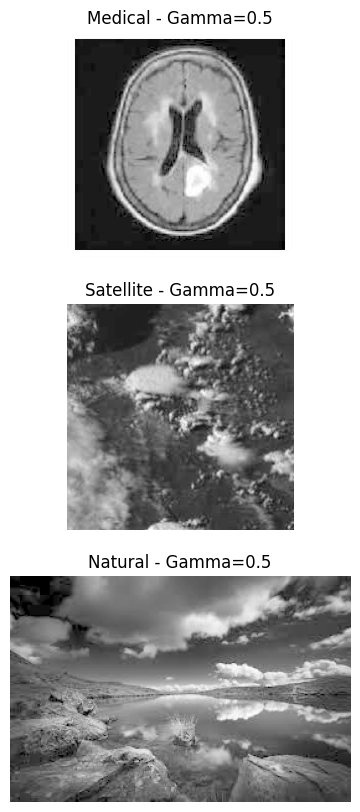

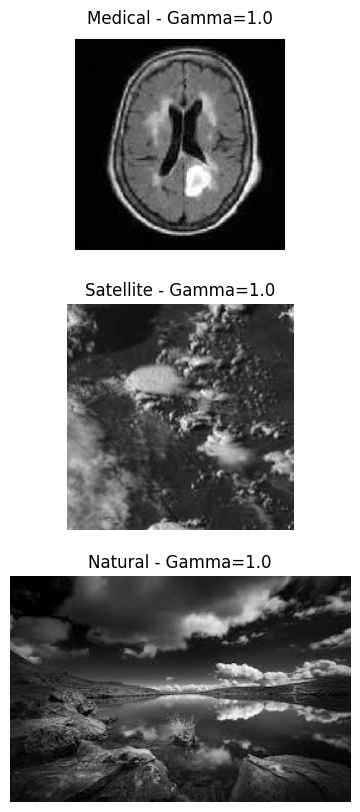

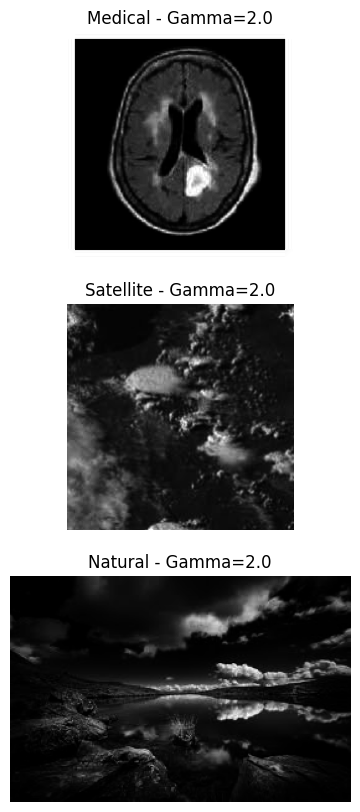

In [3]:
def power_law_transformation(image, gamma=1.0, c=1.0):
    # Convert image to float32
    image_float = np.float32(image) / 255.0
    # Apply power-law transformation
    power_law_image = c * np.power(image_float, gamma)
    # Normalize to 0-255
    power_law_image = np.uint8(255 * power_law_image)
    return power_law_image

# Load different types of images
images = {
    'Medical': cv2.imread('/content/sample_data/download.jpeg', cv2.IMREAD_GRAYSCALE), # 'medical_image.jpg'
    'Satellite': cv2.imread('/content/sample_data/download (1).jpeg', cv2.IMREAD_GRAYSCALE), # 'satellite_image.jpg'
    'Natural': cv2.imread('/content/sample_data/download (2).jpeg', cv2.IMREAD_GRAYSCALE) # 'natural_image.jpg'
}

gammas = [0.5, 1.0, 2.0]

for gamma in gammas:
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(images.items()):
        transformed_image = power_law_transformation(image, gamma)
        plt.subplot(len(images), len(gammas), i*len(gammas) + gammas.index(gamma) + 1)
        plt.title(f'{title} - Gamma={gamma}')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

    plt.show()
